<a href="https://colab.research.google.com/github/Sashank11/learn_tensorflow/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

In [19]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.8.2


## Creating data to view and fit

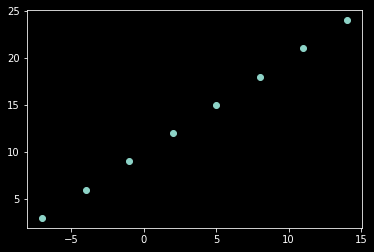

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels 
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize
with plt.style.context('dark_background'):
  plt.scatter(X,y);

In [21]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output Shapes

In [22]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [23]:
X.shape, y.shape

((8,), (8,))

In [24]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [25]:
X[0].ndim

0

In [26]:
X[0], y[0] # In this case we use only 1 X value to predict 1 y value

(-7.0, 3.0)

In [27]:
# Turn our NumPy arrays into tensors
X = tf.constant(X);
y = tf.constant(y);
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [28]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

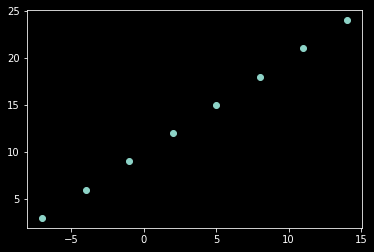

In [29]:
with plt.style.context("dark_background"):
  plt.scatter(X,y);

# Steps in modelling with TensorFlow

## 1.  Creating a model - define input, hidden, output layers of a DL model
## 2.  Compiling a model - define loss function(error rate/amount), optimizer and evaluation metrics
## 3.  Fitting a model - letting the model try to find patterns b/w X and y

In [30]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(lr = 1), # SGD: Stochasitc gradient descent
              metrics=["mae"])
# 3. Fit the model
model.fit(tf.expand_dims(X,axis = -1), y, epochs=100);

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 1s 998ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/100
1/1 [==============================] - 0s 21ms/step - loss: 7.0048 - mae: 7.0048
Epoch 3/100
1/1 [==============================] - 0s 20ms/step - loss: 9.4578 - mae: 9.4578
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 10.1106 - mae: 10.1106
Epoch 5/100
1/1 [==============================] - 0s 22ms/step - loss: 8.2394 - mae: 8.2394
Epoch 6/100
1/1 [==============================] - 0s 21ms/step - loss: 5.5039 - mae: 5.5039
Epoch 7/100
1/1 [==============================] - 0s 23ms/step - loss: 4.3896 - mae: 4.3896
Epoch 8/100
1/1 [==============================] - 0s 18ms/step - loss: 4.9851 - mae: 4.9851
Epoch 9/100
1/1 [==============================] - 0s 15ms/step - loss: 4.8325 - mae: 4.8325
Epoch 10/100
1/1 [==============================] - 0s 21ms/step - loss: 4.0845 - mae: 4.0845
Epoch 11/100
1/1 [==============================] - 0s 15ms/step - loss: 2.8

In [31]:
# Try and make prediction
model.predict([17.0])

array([[24.42508]], dtype=float32)

## Improving our Model
### We can improve model by altering the steps we took to Create
### 1. Creating a model - Here we add more layers, increase hidden units, change activation function of each layer
### 2. Compiling a model - Here we change Optimization function or learning rate
### 3. Fitting a model - increase epochs or increase data

In [32]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation ="relu"),
  tf.keras.layers.Dense(100, activation ="relu"),
  tf.keras.layers.Dense(100, activation = "relu"),
  tf.keras.layers.Dense(1)
])
model.compile(loss = tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr = 0.1),
              metrics=["mae"])
model.fit(tf.expand_dims(X, axis = -1), y, epochs = 100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 1s 956ms/step - loss: 13.3030 - mae: 13.3030
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 99.7780 - mae: 99.7780
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 9.2314 - mae: 9.2314
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 12.9976 - mae: 12.9976
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 11.4197 - mae: 11.4197
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 5.2410 - mae: 5.2410
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 18.7342 - mae: 18.7342
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 7.2566 - mae: 7.2566
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 9.0452 - mae: 9.0452
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 9.8199 - mae: 9.8199
Epoch 11/100
1/1 [==============================] - 0s 8ms/step - loss: 6.889

In [33]:
model.predict([17.0])

array([[26.582006]], dtype=float32)

## Evaluating a model

When it comes to evaluation... there are 3 words you should memorize:
> "Visualize", "Visualize", "Visualize"

It's good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model - What does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth(the Original Labels)?

In [34]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [35]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

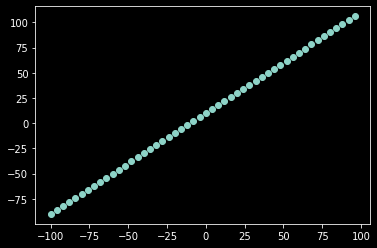

In [37]:
# Visualize data
with plt.style.context("dark_background"):
  plt.scatter(X,y)

In [44]:
from sklearn.model_selection import train_test_split
import pandas as pd
df = pd.DataFrame(X)
df
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

,0
0,-100
1,-96
2,-92
3,-88
4,-84
5,-80
6,-76
7,-72
8,-68
9,-64
